# 1. Análise Exploratória de Dados e Machine Learning

# 1.1 Introdução

O seguinte projeto tem como objetivo fazer uma análise exploratória detalhada de um banco de dados cinematográfico e construir um modelo preditivo. 
No final teremos orientações, com base em todas as respostas obtidas, para que tipo de filme deverá ser produzido por um estúdio da Hollywood chamado PProductions.
O projeto inteiro consiste em partes que são: Dicionário dos Dados, Limpeza de dados, Análise Exploratória seguida de perguntas e respostas, Modelo Preditivo, Explicação do Modelo e por fim a Conclusão.

# 1.2 Dicionário dos Dados

**Series_Title** – Nome do filme <br>
**Released_Year** - Ano de lançamento <br>
**Certificate** - Classificação etária <br>
**Runtime** – Tempo de duração<br>
**Genre** - Gênero<br>
**IMDB_Rating** - Nota do IMDB<br>
**Overview** - Overview do filme<br>
**Meta_score** - Média ponderada de todas as críticas<br>
**Director** – Diretor<br>
**Star1** - Ator/atriz #1<br>
**Star2** - Ator/atriz #2<br>
**Star3** - Ator/atriz #3<br>
**Star4** - Ator/atriz #4<br>
**No_of_Votes** - Número de votos<br>
**Gross** - Faturamento<br>

# 1.3 Importando bibliotecas necessárias para a Análise 

No primeiro passo conforme abaixo, instalei e importei todas as bibliotecas que achei que seriam as mais úteis para o projeto. Cada uma delas foi importante para códigos, gráficos, modelo preditivo e cálculos estatísticos. 

In [1539]:
import pandas as pd # Essencial para todo o projeto e análise
import warnings # Vai alertar sobre algum erro não fatal mas que pode causar algum problema depois
warnings.filterwarnings('ignore') # Ignora os alertas para não mostrar nos outputs, podemos checar os alertas e depois ignorá-los
import seaborn as sns # Possibilita uma boa visualização de dados por meio dos gráficos interativos
sns.set() # Com isso posso escolher alguns estilos para os gráficos
import matplotlib.pyplot as plt # Também cria gráficos
# Para os gráficos ficarem logo abaixo das células
%matplotlib inline 
from wordcloud import WordCloud # Com isso posso criar uma nuvem de palavras 
from sklearn.model_selection import train_test_split # Separa dados de treino e teste para o modelo preditivo
from sklearn.linear_model import LinearRegression # Para utilizar o modelo de Regressão Linear
from sklearn import metrics # Para calcular o desenpenho do modelo

# 1.4 Carregando dados e Mostrando o DataFrame

Com as bibliotecas prontas para serem usadas, posso carregar os dados e observar as variáveis, seus tipos, os valores e etc.

In [1540]:
df = pd.read_csv('desafio_indicium_imdb.csv') # Carrega os dados
df.head() # Mostra as primeiras 5 linhas do dataframe

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# 1.5 Observando as características das variáveis 

In [1541]:
df.columns # Para observar todas as colunas 

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [1542]:
df.info() # Mostra com que tipo de váriaveis estamos trabalhando 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [1543]:
print(f"O número de linhas são {df.shape[0]}, e de colunas são {df.shape[1]}.")

O número de linhas são 999, e de colunas são 16.


Nesta seção já pude identificar que colunas podem ser removidas e quais variáveis devo converter e para o que.

# 1.6 Preparação dos Dados

In [1544]:
# Para remover algumas colunas 
colunas = ['Star2', 'Star3', 'Star4', 'Unnamed: 0']
df = df.drop(columns= colunas)
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'No_of_Votes', 'Gross'],
      dtype='object')

Removi essas colunas porque achei que seria difícil trabalhar com tantos nomes e o "Unnamed" não tem nenhuma relevância. Preferi ficar apenas com algumas strings e colunas com números.

In [1545]:
# Verificar se há nulos e duplicados
null = df.isnull().sum()  
dup = df.duplicated().sum()

print(null, dup)

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
No_of_Votes        0
Gross            169
dtype: int64 0


Identificar os nulos para depois removê-los é algo importante para mim, porque posso trabalhar com menos linhas de dados, oque facilita muito na análise.

In [1546]:
df['Released_Year'] = df['Released_Year'].replace('PG', pd.NA) # Para remover valores diferentes de ano e substituir por nulo

df = df.dropna(subset= ['Certificate', 'Meta_score', 'Gross', 'Released_Year']) # Agora removemos os nulos de todo o dataset

Quando tentei converter a variável "Released_Year" ocorreu um erro dizendo que havia um valor diferente de número que foi o "PG", por isso removi especificamente esse valor e converti para nulo para depois remover, foi o método que achei melhor para este tipo de problema.

In [1547]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(int) # Retira as vírgulas e converte para integer
df['Meta_score'] = df['Meta_score'].replace('.', '').astype(int) # Retira o ponto e converte para integer

df['Runtime'] = df['Runtime'].str.replace(r'[^0-9]', '', regex=True).astype(int) # Tira o "min" e converte para integer

df['Released_Year'] = df['Released_Year'].astype(int) # Converte para integer

In [1548]:
df['Decada'] = (df['Released_Year'] // 10) * 10 # Adiciona coluna com década

Pensei nesta maneira mais fácil de lidar com a coluna "Released_Year", pois depois de tentar análisar com gráficos os anos relacionados com as notas (você poderá ver mais a frente) percebi então uma certa dificuldade, por isso achei melhor optar por uma coluna de décadas.

In [1549]:
# Checando as mudanças
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   712 non-null    object 
 1   Released_Year  712 non-null    int64  
 2   Certificate    712 non-null    object 
 3   Runtime        712 non-null    int64  
 4   Genre          712 non-null    object 
 5   IMDB_Rating    712 non-null    float64
 6   Overview       712 non-null    object 
 7   Meta_score     712 non-null    int64  
 8   Director       712 non-null    object 
 9   Star1          712 non-null    object 
 10  No_of_Votes    712 non-null    int64  
 11  Gross          712 non-null    int64  
 12  Decada         712 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 77.9+ KB


**Estátisticas Descritivas**

In [1550]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Decada
count,712.000000,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02,712.000000
mean,1995.738764,123.667135,7.935674,77.154494,3.534662e+05,7.845017e+07,1991.109551
std,18.611182,25.907607,0.288928,12.418115,3.464502e+05,1.150686e+08,18.480364
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03,1930.000000
25%,1986.750000,104.000000,7.700000,69.750000,9.566475e+04,6.143199e+06,1980.000000
50%,2001.000000,120.000000,7.900000,78.000000,2.359815e+05,3.485015e+07,2000.000000
75%,2010.000000,136.000000,8.100000,86.000000,5.065428e+05,1.023606e+08,2010.000000
max,2019.000000,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08,2010.000000


# 2. EDA com Perguntas e Respostas 

**Para a Análise Exploratória, irei ir respondendo perguntas com análises de gráficos, tabelas, hipóteses e os insights**

# 2.1 Qual filme você recomendaria para uma pessoa que você não conhece?

Uma boa maneira de determinarmos isso seria por meio das Notas (imdb), Número de Votos (se muitas pessoas gostaram) e Faturamento (muitas pessoas assistiram).

No meu caso, antes de procurar um filme, sempre acho válido procurar pelas avaliações daquele filme para ter um pouco de confiança se vai ser um filme bom ou não. Claro que nem sempre uma pessoa vai gostar de um filme que milhares de outras gostaram, mas na maioria das vezes pode ser que se identifique com aquele tipo de filme, talvez se torne um filme favorito para pessoa.

In [1551]:
# Lista com os fatores que acho mais importantes na recomendação de um filme 
lista = ['Gross', 'No_of_Votes', 'IMDB_Rating'] 
 # Agrupa a coluna com a média de cada item da lista e depois ordena por votos (mais relevante)
df_recomendar = df.groupby('Series_Title')[lista].mean().reset_index().sort_values(by='No_of_Votes', ascending=False) 
df_recomendar.head(1)

,Series_Title,Gross,No_of_Votes,IMDB_Rating
546,The Dark Knight,534858444.0,2303232.0,9.0


Ao observar a tabela podemos agora saber que filme fez mais sucesso e possui um maior número de avaliações após ordenar por número de votos.

# 2.2 Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


Podemos começar criando algumas relações (Atores e Diretores). Na minha concepção atores e diretores assumem um papel super importante na construção do filme e isso, consequentemente, influência no faturamento de um filme.

In [1552]:
df_atores = df.groupby('Star1')['Gross'].mean().reset_index().sort_values(by='Gross', ascending=False) # Agrupa a coluna dos atores com a média de faturamento e depois ordena 
df_atores = df_atores.head(5)
df_atores

,Star1,Gross
100,Daisy Ridley,9.366622e+08
402,Sam Worthington,7.605076e+08
235,Joe Russo,5.512599e+08
150,Felicity Jones,5.321773e+08
185,Henry Thomas,4.351106e+08


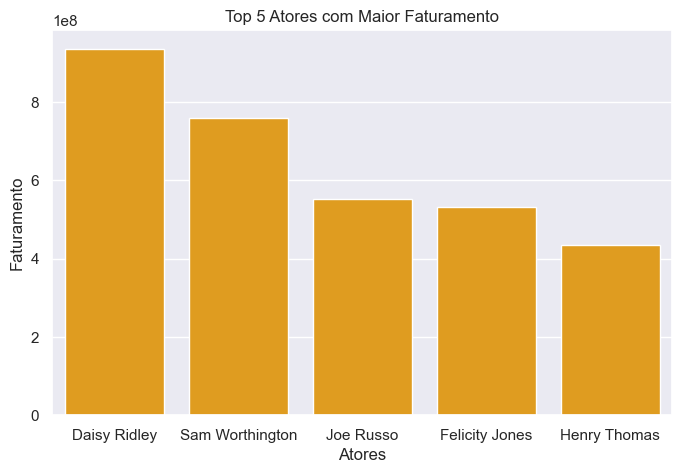

In [1553]:
# Podemos visualizar melhor por meio do gráfico de barras
plt.figure(figsize=(8, 5)) # Tamanho da figura
sns.barplot(data=df_atores, x='Star1', y='Gross', color='Orange')  # Tipo de gráfico, eixo x e y, e cor
plt.title('Top 5 Atores com Maior Faturamento') # Título
plt.xlabel('Atores') # Nome eixo x
plt.ylabel('Faturamento') # Nome eixo y
plt.show() # Mostra

In [1554]:
df_diretores = df.groupby('Director')['Gross'].mean().reset_index().sort_values(by='Gross', ascending=False) # mudando a apenas para coluna de diretores
df_diretores = df_diretores.head(5)
df_diretores

,Director,Gross
24,Anthony Russo,5.512599e+08
108,Gareth Edwards,5.321773e+08
141,J.J. Abrams,4.743903e+08
195,Josh Cooley,4.340380e+08
319,Roger Allers,4.227838e+08


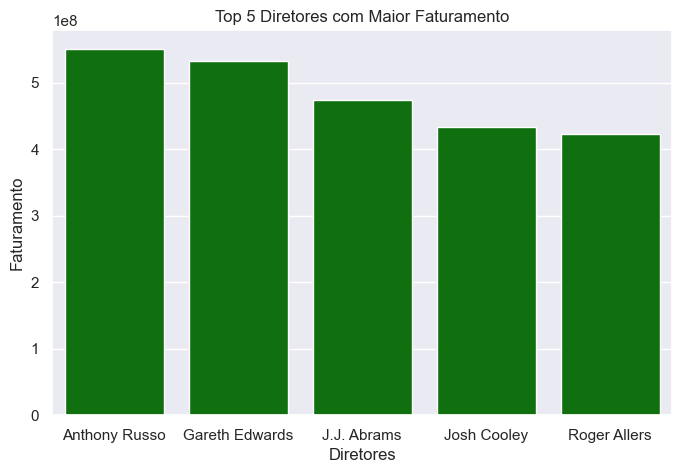

In [1555]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_diretores, x='Director', y='Gross', color='Green')
plt.title('Top 5 Diretores com Maior Faturamento')
plt.xlabel('Diretores')
plt.ylabel('Faturamento')
plt.show()

Acrescentando mais um fator, o gênero também pode desenvolver um papel importante no filme, se pegarmos o gênero que geralmente faz mais sucesso em filmes podemos considerar que também há influência no faturamento.

In [1556]:
df['Genre'] = df['Genre'].str.split(", ") # Cria uma lista dos gêneros
df_genre = df.explode("Genre") # Separa os gêneros 

Criei uma variação do dataset original para gêneros, que também vai ser usado para a pergunta 3 (2.3) adiante.

Para não alterar o dataset que eu criei, eu armazenei o agrupamento de gênero pela média de faturamento em outra variável:

In [1557]:
relacao = df_genre.groupby('Genre')['Gross'].mean().reset_index().sort_values(by='Gross', ascending=False) 
relacao = relacao.head(5)
relacao

,Genre,Gross
1,Adventure,1.718806e+08
16,Sci-Fi,1.611225e+08
0,Action,1.566213e+08
2,Animation,1.359713e+08
8,Fantasy,1.105749e+08


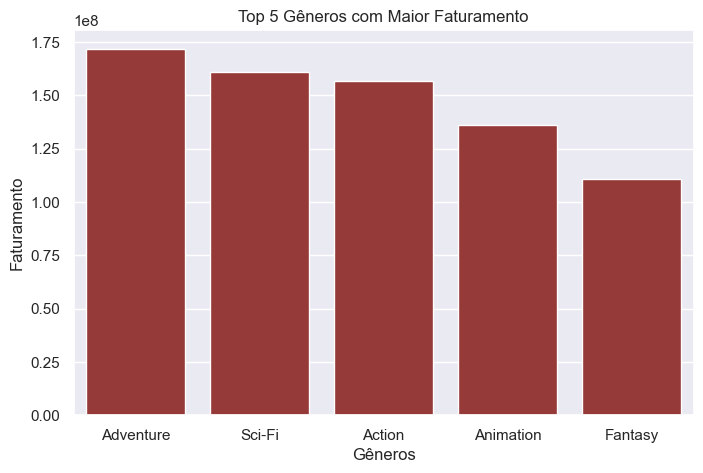

In [1558]:
plt.figure(figsize=(8, 5))
sns.barplot(data=relacao, x='Genre', y='Gross', color='Brown')
plt.title('Top 5 Gêneros com Maior Faturamento')
plt.xlabel('Gêneros')
plt.ylabel('Faturamento')
plt.show()

Com essas tabelas, podemos então, visualizar a relação que Atores, Diretores e Gêneros têm com o Faturamento.

Indo para uma análise mais aprofundada e com gráficos podemos obter algumas hipóteses.

In [1559]:
# Tirando mais colunas para filtrar mais o dataset e obtermos melhores análises
colunas = ['Star1','Overview', 'Series_Title', 'Director', 'Certificate','Genre', 'Decada'] 
df_filtrado = df.drop(columns= colunas)

In [1560]:
df_filtrado.info() #verificando se não ficou nenhum string

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 996
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  712 non-null    int64  
 1   Runtime        712 non-null    int64  
 2   IMDB_Rating    712 non-null    float64
 3   Meta_score     712 non-null    int64  
 4   No_of_Votes    712 non-null    int64  
 5   Gross          712 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 38.9 KB


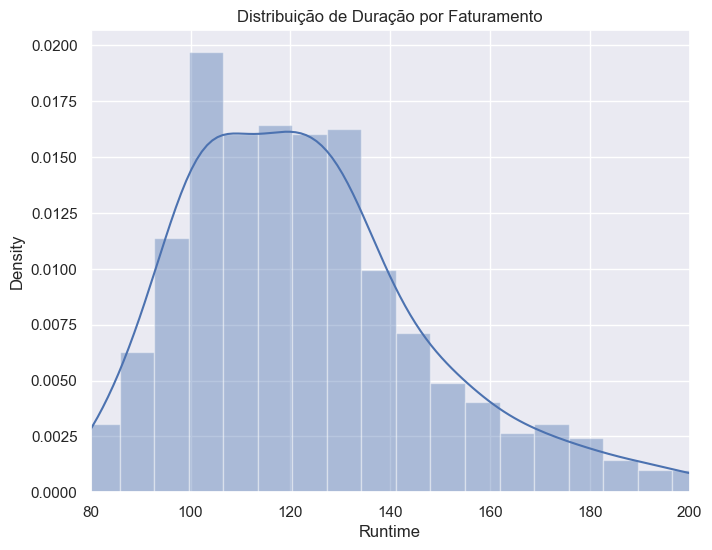

In [1561]:
#Distribuição de duração do filme
fig= plt.figure(figsize=(17,6))
ax=fig.add_subplot(121)
sns.distplot(df_filtrado[(df_filtrado.Gross > 10)]["Runtime"],color='b',ax=ax)
plt.xlim(80, 200)
ax.set_title('Distribuição de Duração por Faturamento');

Quis testar algumas distribuições mas agora com variáveis diferentes das que usei anteriormente para visualizar o seu comportamento. 

Temos um maior Faturamento em filmes com Duração de 100 min e um pouco mais. Com isso podemos filtrar alguns filmes do dataset para analisar quais são.

In [1562]:
duracao = df[(df['Runtime'] >= 100) & (df['Runtime'] <= 105)] # Filmes que estão entre duração de 100 e 105 
duracao ['Series_Title'] # Títulos dos filmes

49              Casablanca
60                    Coco
67                Oldeuboi
95                  Snatch
96     Requiem for a Dream
              ...         
947             The Others
952        American Psycho
958              Dark City
968     Dazed and Confused
972             Home Alone
Name: Series_Title, Length: 87, dtype: object

In [1563]:
duracao.shape[0] # Quantidade de filmes com duração de 100 min e 105

87

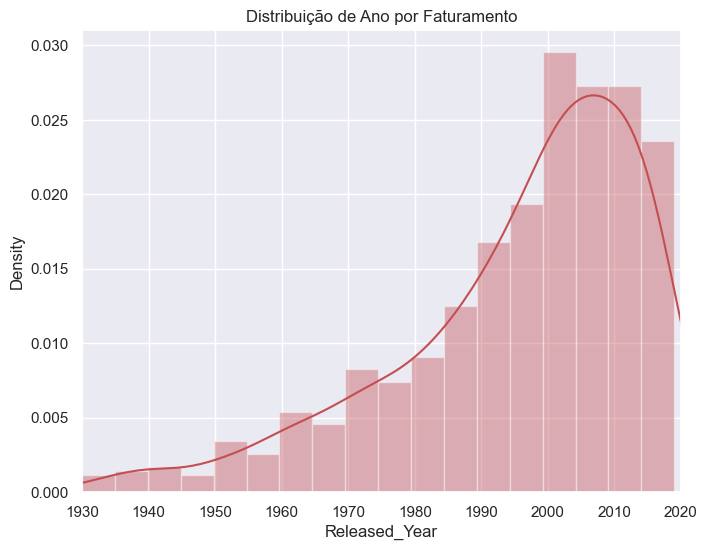

In [1564]:
fig= plt.figure(figsize=(17,6))
ax=fig.add_subplot(121)
sns.distplot(df_filtrado[(df_filtrado.Gross > 10)]["Released_Year"],color='r',ax=ax)
plt.xlim(1930, 2020)
ax.set_title('Distribuição de Ano por Faturamento');

Aqui vemos que o faturamento de filmes aumenta a cada ano. Também é um ponto interessante a observar que os filmes entre 2000 e 2015 obteram maior faturamento. Que tipo de informação poderiamos extrair a partir disso? A informação bem relevante, seria análisar quais filmes foram lançados neste período de tempo, assim podemos nos basear neles para desenvolver um filme com alta expectativa de faturamento.

In [1565]:
filmes = df[(df['Released_Year'] >= 2000) & (df['Released_Year'] <= 2015)] # Filmes que estão entre 2000 e 2015 
filmes['Series_Title'] # Títulos dos filmes lançados entre 2000 e 2015

1                                        The Dark Knight
4          The Lord of the Rings: The Return of the King
7                                              Inception
9      The Lord of the Rings: The Fellowship of the Ring
12                 The Lord of the Rings: The Two Towers
                             ...                        
947                                           The Others
948                                                 Blow
949                                   Enemy at the Gates
950                                      Minority Report
952                                      American Psycho
Name: Series_Title, Length: 314, dtype: object

In [1566]:
filmes.shape[0] # Número total de filmes entre este período

314

Agora utilizando a correlação entre as variáveis, pode-se entender que peso tem cada uma sobre a outra.

In [1567]:
# Tabela de correlação
corr = df_filtrado.corr()
corr

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.017884,-0.178896,-0.272659,0.200074,0.234654
Runtime,-0.017884,1.000000,0.258985,-0.005938,0.213211,0.168775
IMDB_Rating,-0.178896,0.258985,1.000000,0.283994,0.609444,0.132396
Meta_score,-0.272659,-0.005938,0.283994,1.000000,0.028575,-0.014656
No_of_Votes,0.200074,0.213211,0.609444,0.028575,1.000000,0.561532
Gross,0.234654,0.168775,0.132396,-0.014656,0.561532,1.000000


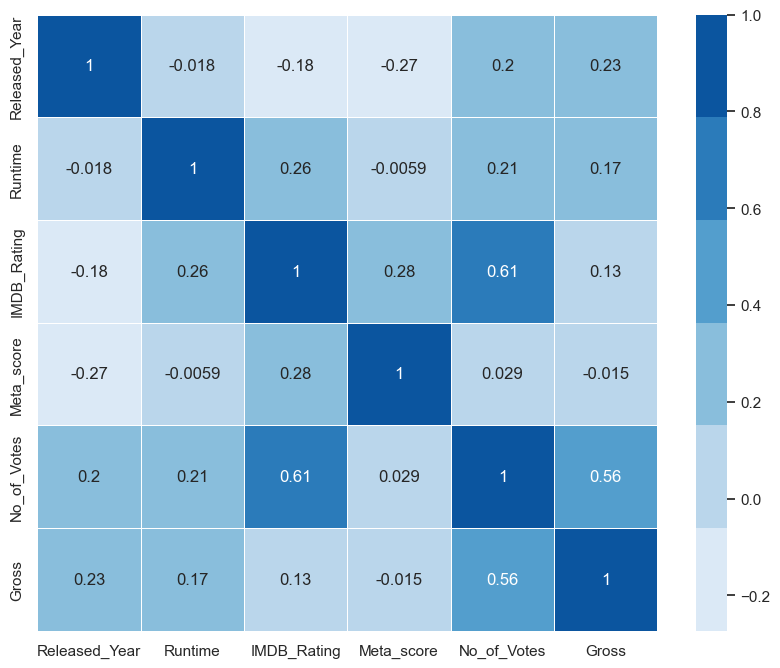

In [1568]:
#Vamos ver a correlação graficamente
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

Podemos notar que o Faturamento e a Nota IMDB de um filme tem uma forte correlação com o Número de Votos

Se quisermos agora saber sobre Notas IMDB e a sua relação com anos podemos fazer assim:

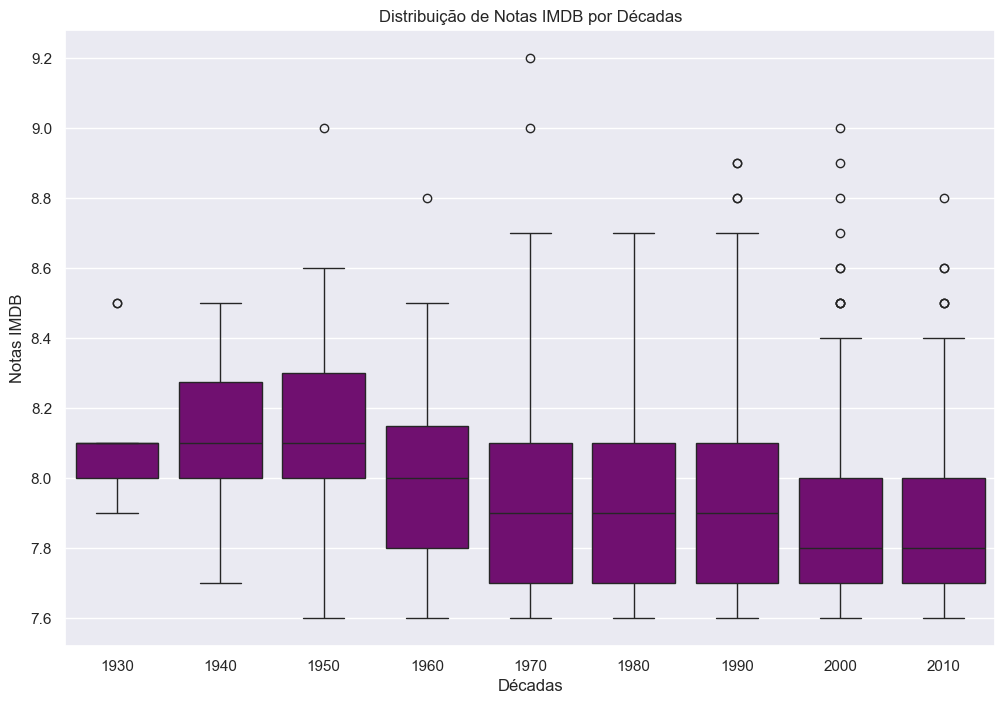

In [1569]:
# Criação de gráfico que irá nos mostrar a distribuição de notas por décadas e assim verificar se filmes antigos realmente recebem notas mais altas em comparação com os mais atuais
plt.figure(figsize=(12, 8)) # Tamanho da figura
sns.boxplot(data=df, x='Decada', y='IMDB_Rating', color='Purple') # Tipo de gráfico, eixo x e y, e cor
plt.title('Distribuição de Notas IMDB por Décadas') # Título
plt.xlabel('Décadas') # Nome eixo x
plt.ylabel('Notas IMDB') # Nome eixo y
plt.show() # Mostra

Pode ser testado também com a Média das Notas

In [1570]:
df_grouped = df.groupby('Decada')['IMDB_Rating'].mean().reset_index()

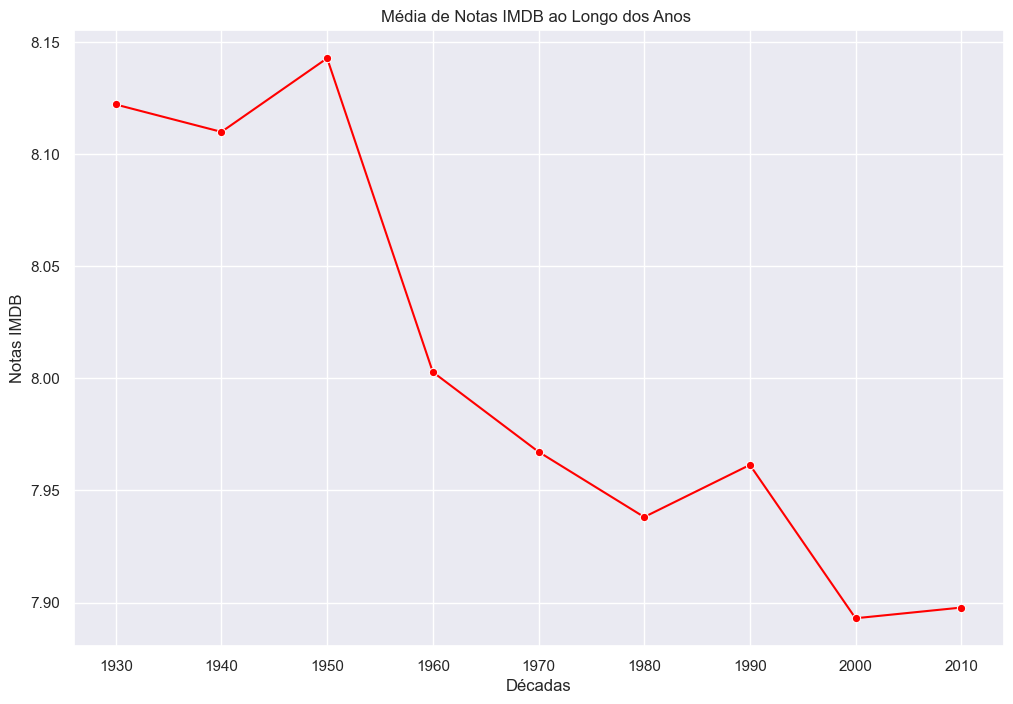

In [1571]:
# Podemos visualizar melhor por meio do gráfico de linhas 
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_grouped, x='Decada', y='IMDB_Rating', marker='o', color='Red')
plt.title('Média de Notas IMDB ao Longo dos Anos ')
plt.xlabel('Décadas')
plt.ylabel('Notas IMDB')
plt.show()

Quis trazer essa relação, para entender um pouco mais sobre as notas imdb.

E notamos que filmes mais antigos tendem a receber notas médias mais altas no IMDB, provavelmente devido ao menor número de avaliações registradas, pois lá no gráfico de heatmap, vemos que a nota tem forte correlação com o número de votos.

Com base em toda esta análise, concluí que os principais fatores que estão ligados com a alta expectativa de faturamento de um filme são:
- Atores
- Diretores
- Duração
- Ano de lançamento (podemos verificar que filmes fizeram mais sucesso em um perído de tempo)
- Gênero

# 2.3 Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Para gerarmos insights e possivelmente dizer se podemos ou não inferir um gênero do filme a partir da coluna overview, precisamos criar gráficos, assim facilita a visualização para surgimento de ideias.

Escolhi o gráfico wordcloud por se encaixar perfeitamente com o tipo de dado da coluna Overview, como essa coluna contém descrições para cada filme, o melhor a se fazer então para gerarmos um possivel insight seria visualizar as palavras mais frequentes de toda a coluna. 

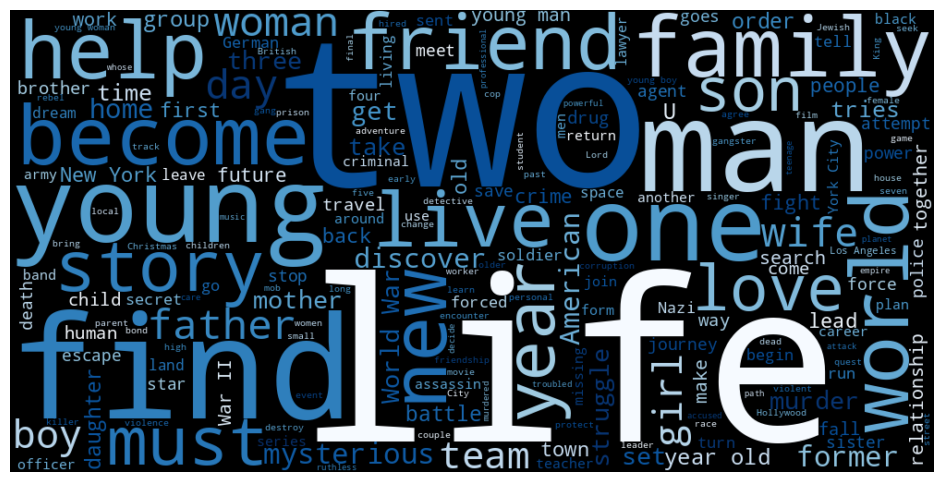

In [1572]:
# Utilizando um arquivo de palavras não uteis 
stopwords = open('stopwords.txt').read()
# Transforma os stopwords em um lista
lista_stopwords = set(stopwords.splitlines())

# Juntando as descrições
texto = " ".join(df['Overview'])


# Inicializa uma word cloud
wordcloud = WordCloud(stopwords = lista_stopwords,
                      background_color = 'black', 
                      width = 1000,
                      height = 500, 
                      colormap="Blues_r") 

# Gera uma wordcloud através do texto
wordcloud.generate(texto)

plt.figure(figsize = (12, 6)) 
plt.imshow(wordcloud, interpolation = 'bilinear') # Plotagem da nuvem de palavras
plt.axis('off') 

plt.show() 

Agora que criamos o gráfico, a wordcloud revela algumas palavras mais usadas, isso facilita na extração de insights.

Como forma de utilizar as palavras mais frequentes do wordcloud, optei por relacionar os gêneros que aparecem mais vezes quando procuro por uma determinada palavra incluida no overview. Isso possibilita identificar que palavras devem ser mais usadas em um overview, como uma forma de estratégia para transmitir o gênero do filme e do que ele se trata.

In [1573]:
def look_word(palavra):
    # filtrar linhas onde 'Overview' contém a palavra 
    df_genre['tem_palavra'] = df_genre['Overview'].str.contains(palavra, case=False, na=False)
    
    # agrupar pelo gênero onde contém a palavra no overview e quantidade de vezes
    relacao_genero = df_genre[df_genre['tem_palavra']].groupby('Genre').size().reset_index(name='Qtd')
    return relacao_genero

look_word(palavra='friend').sort_values(by= 'Qtd', ascending= False)[:2]

,Genre,Qtd
6,Drama,46
4,Comedy,21


In [1574]:
#como criamos a função agora fica mais fácil testar outras palavras
look_word(palavra='life').sort_values(by= 'Qtd', ascending= False)[:2]

,Genre,Qtd
6,Drama,66
3,Biography,17


In [1575]:
look_word(palavra='find').sort_values(by= 'Qtd', ascending= False)[:2]

,Genre,Qtd
6,Drama,47
1,Adventure,16


São muitas palavras para analisar, mas com base nas três tabelas que construí, é possível inferir o gênero de um filme a partir de sua descrição. Por exemplo, ao olhar para a palavra "friend", intuitivamente eu poderia associá-la a comédia ou animação, por transmitir amizade e companheirismo. No entanto, não é possível determinar o gênero apenas pela intuição. A seguir, vou demonstrar o uso de tabelas na prática com um filme.

In [1576]:
movie = df[df['Series_Title'] == 'The Dark Knight'] # Filme mais famoso conforme minhas análises anteriores
movie['Overview'].iloc[0]  

'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.'

In [1577]:
movie['Genre'].iloc[0]   

['Action', 'Crime', 'Drama']

Testei com as palavras que mais achei relevante.

In [1578]:
look_word(palavra='fight').sort_values(by= 'Qtd', ascending= False)[:2]

,Genre,Qtd
6,Drama,23
0,Action,17


In [1579]:
look_word(palavra='injustice').sort_values(by= 'Qtd', ascending= False)[:2]

,Genre,Qtd
0,Action,1
1,Crime,1


Em conclusão, a descrição do filme asssume um papel importante, porque é por ela que se transmite a ideia e o gênero do filme. Assim, quando alguém procura um tipo específico de filme, ler a descrição ajuda a entender do que se trata e aumenta as chances de a pessoa se interessar e querer assistir.

# 3.Modelo de Regressão Linear e Preparação dos Dados

In [1580]:
#Separando os dados
colunas = ['Star1','Overview', 'Series_Title', 'Director', 'Certificate', 'Genre', 'Decada'] 
model_set = df.drop(columns= colunas)

x = model_set.drop(['IMDB_Rating'], axis = 1)
y = model_set.IMDB_Rating

Adaptei o conjunto de dados original para um conjunto sem algumas variáveis que achei que interfeririam no processo de previsão. 

O x recebe um conjunto de dados sem a variável contendo as notas imdb e o y recebe as notas imdb. Isso funciona como um mecanismo de entrada e saída, a entrada seria o x e a saída o y, se eu quero que a minha máquina aprenda algo e preveja por meio desse aprendizado, então eu devo inserir dados sem o valor que eu quero que ela preveja e só depois dar os valores pra ela.

In [1581]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Logo acima eu treinei o modelo separando x e y para testes e treinos, sendo 80% treino e 20% teste. 

In [1582]:
#Verificando o resultado
r_sq = lr.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.517329258743929


Aqui temos a primeira medida de desempenho, seu resultado foi satisfatório considerando que o valor mostra a quantidade de variação das notas imdb.

In [1583]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Released_Year,-3.718495e-03
Runtime,1.214837e-03
Meta_score,4.686896e-03
No_of_Votes,6.602884e-07
Gross,-7.258044e-10


Baseado nos coeficientes podemos visualizar que variáveis possuem mais ou menos influência. Maior: Meta_score, Menor: Gross

In [1584]:
# Teste com as variáveis e outras métricas
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"Erro Percentual Absoluto Médio (MAPE): {mape * 100:.2f}%")

MAE: 0.15696266571423703
MSE: 0.04039714999486239
Erro Percentual Absoluto Médio (MAPE): 1.97%


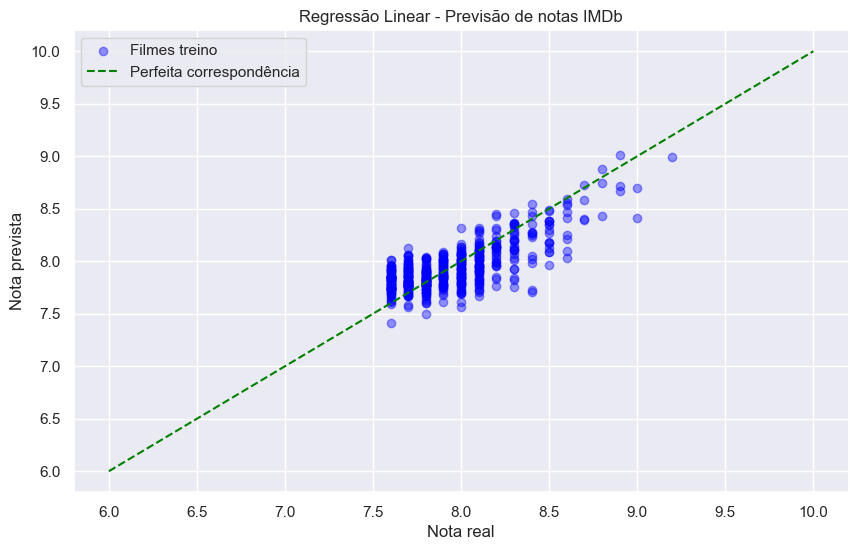

In [1585]:
lr.fit(x_train, y_train)

# Previsões do conjunto de treino
y_pred_train = lr.predict(x_train)

# Plot da regressão
plt.figure(figsize=(10,6))

# Pontos reais
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.4, label='Filmes treino')


# Linha y=x para referência
plt.plot([6,10], [6,10], color='green', linestyle='--', label='Perfeita correspondência')

plt.xlabel("Nota real")
plt.ylabel("Nota prevista")
plt.title("Regressão Linear - Previsão de notas IMDb")
plt.legend()
plt.show()

Utilizei o gráfico de regressão linear para termos uma melhor visualização da previsão das notas. Lembrando que quanto mais as bolinhas estiverem juntas na linha verde melhor é a previsão e se tiverem mais espalhadas e sem muita concentração na linha menos é a previsão. Neste caso as bolinhas estão bem perto da linha, ou seja, o modelo foi bem treinado e está dando uma boa previsão.

In [1586]:
import pickle # Importar piclke para salvar o arquivo com .pkl

with open("modelo.pkl", "wb") as arquivo:
    pickle.dump(lr, arquivo)

# 3.1 Explicando o Modelo  

# 3.2 Quais variáveis e/ou suas transformações você utilizou e por quê?

Utilizei as variáveis "Runtime", "Meta_score", "No_of_Votes", "Gross" e "Decada".

Na variável **"Runtime" (duração)**, eu quis uliliza-la, pois conforme a análise exploratória que fiz anteriormente e observando o gráfico de distribuição, percebi que é uma variável relevante para o modelo e que ao treinar a máquina isso aumentaria a sua previsão. Tranformei removendo a palavra "min", porque caso contrário eu não poderia converter para integer depois. 

O **"Meta_score"** é outra variável muito importante para o modelo, por ser a média ponderada de críticas do filme, ou seja, se um filme possui mais crítica a sua nota imdb pode diminuir, ao contrário de um filme que possui menos e maior nota, tudo isso eu descrobri ao visualizar o gráfico de heatmap na análise exploratória. Transformei-a convertendo para integer e removendo o ".0" já que não tem necessidade.

O **"No_of_Votes"**, também tem forte relevância, isso observamos no gráfico de heatmap, onde a nota imdb tem maior correlação com o número de votos. Não fiz nada para transformação.

A mesma coisa acontece com o **"Gross"** praticamente, por ser o faturamento do filme. Não preciso explicar com tanta profundeza por ser uma variável importante em vários aspectos e já fica bem claro ao visualizar os dados pela primeira vez. Transformei removendo as vírgulas para só então converter para integer. 

Na **"Decada"**,  é apenas uma coluna que contém a década de quando foi lançado o filme, onde vem da variável Released_Year. Quis usar esta váriavel, porque fica mais fácil quando simplificarmos os números para o modelo reconhecer com mais facilidade o período que o filme foi lançado e assim relacionar de forma mais eficaz. Para transformar a variável Released_Year para década basta dividir e multiplicar por 10.

# 3.3 Qual tipo de problema estamos resolvendo (regressão, classificação)?

Depois de muitas pesquisas para entender os principais conceitos de Regressão e Classificação. Eu pude entender que o problema é de Regressão, pelo fato de que esse tipo de problema está relacionado com valores contínuos ou aproximados. Como o objetivo é prever a Nota IMDB e não Classificar algo como padrões de flores, por exemplo, concluí que deve ser Regressão.

# 3.4 Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

O modelo de Regressão Linear foi o que mais se aproximou na minha concepção. 

Seus prós:
- É um modelo simples
- Da para interpretar com facilidade
- Velocidade é maior

Seus contras:
- Não captura a complexidade real por ser muito simples
- Incapaz de determinar a importância das características
- É fortemente afetado por Outliers

# 3.5 Qual medida de performance do modelo foi escolhida e por quê?

**Coeficiente de determinação (R²)** - Por ser muito útil para modelos lineares, monstrando a proporção da variância dos valores observados que é capturada pelas previsões do modelo.

**Erro médio absoluto (MAE)** - Facilita a interpretação e calcula a média das diferenças absolutas entre os valores reais e os valores previstos pelo modelo.

**Raiz do Erro Quadrático Médio (MSE)** - Destaca maiores erros e encontra a diferença entre os reais valores observados e de previsões.

**Erro Médio Percentual Absoluto (MAPE)** - Mede o erro médio em termos percentuais, podendo ser melhor compreendida.

# 4.Conclusão

O projeto atendeu às etapas propostas, passando pelo dicionário de dados, pela limpeza e análise exploratória, até a implementação e avaliação de um modelo preditivo. O modelo apresentou métricas consistentes, como MAE de 0.15, MSE de 0.04, MAPE de 1,98% e R² de 0.51, demonstrando boa capacidade de previsão dentro das limitações do conjunto de dados. Dessa forma, o trabalho cumpriu com seu objetivo de exercitar a resolução estruturada de um problema de análise de dados, aplicando conceitos estatísticos, técnicas de machine learning e justificando cada decisão tomada ao longo do processo.